In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
from random import shuffle
from tqdm import tqdm
# import matplotlib.pyplot as plt
import random
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd

import evaluate_plot as eval_plot
import batchify as batchify
import vdbm as dbm
from sklearn.metrics import precision_recall_fscore_support

import os
# 1 starts the process on GPU-0
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
torch.__version__

'0.4.0'

In [2]:
data = pickle.load(open('../../Data/final_Physionet_avg_new.pkl','rb'))

In [3]:
# # This is just for testing
# data['train_ids'] = data['train_ids'][:5]
# data['val_ids'] = data['val_ids'][:5]
# data['test_ids'] = data['test_ids'][:5]

In [4]:
params = {'bilstm_flag':True,
        'hidden_dim' : 550,
        'dropout' : 0.9,
        'layers' : 1,
        'tagset_size' : 2,
        'bilstm_flag' : True,
        'attn_category' : 'dot',
        'num_features' : 37,
        'imputation_layer_dim_op':10,
        'selected_feats' : 2,
        'batch_size':1,
        'same_device':True,
        'same_feat_other_device':False,
        'model_name':'VDBM-Phy-Corr-Feats-',
        'feats_provided_flag':True,
        'path_selected_feats':'../../Data/dict_selected_feats_physionet'}
pickle.dump(params, open('../../Models/config_'+params['model_name']+'.pt','wb'))

In [5]:
model_RNN = dbm.RNN_osaka(params).cuda()
loss_function = nn.NLLLoss()
# optimizer = optim.Adam(model_RNN.parameters(), lr=0.01, weight_decay=0.00005)
optimizer = optim.SGD(model_RNN.parameters(), lr=0.0001, weight_decay=0.00000000002)

/home/bsingh/anaconda2/lib/python2.7/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.9 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Dot Attention is being used!


In [6]:
mode = 'normal'
if(mode=='normal'):
    feature_ind = 0
    label_ind = -1
    print "NORMAL mode with Flags"

NORMAL mode with Flags


In [7]:
batch_size = 1
epochs = 45
save_flag = True
dict_df_prf_mod = {}
print "==x=="*20
print "Data Statistics"
print "Train Data: "+str(len(data['train_ids']))
print "Val Data: "+str(len(data['val_ids']))
print "Test Data: "+str(len(data['test_ids']))
print "==x=="*20

==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==
Data Statistics
Train Data: 2517
Val Data: 630
Test Data: 787
==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==


  0%|          | 0/2517 [00:00<?, ?it/s]

=#==#==#==#==#=0=#==#==#==#==#=


100%|██████████| 2517/2517 [23:10<00:00,  1.81it/s]


==========Epoch No:0==========
Training Loss: 1568.38586313
Train: (0.6263512373389508, 0.6491855383392928, 0.5830218275345549, None)
                    0            1
Precision    0.570370     0.658656
Recall       0.167210     0.927318
F-score      0.258606     0.770232
Count      921.000000  1596.000000
--------
Val: (0.6733621933621934, 0.6793650793650794, 0.6531908001295756, None)
                    0           1
Precision    0.651852    0.686869
Recall       0.362140    0.878553
F-score      0.465608    0.770975
Count      243.000000  387.000000
--------
Test: (0.6536357957273928, 0.6670902160101652, 0.6466233359078489, None)
                    0           1
Precision    0.592593    0.690635
Recall       0.377104    0.842857
F-score      0.460905    0.759191
Count      297.000000  490.000000




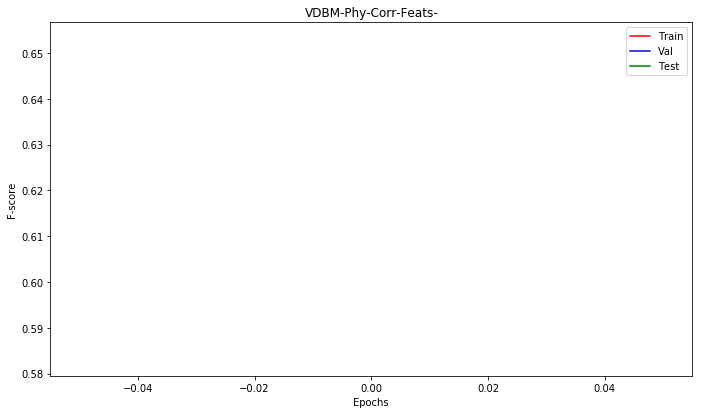

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch0========
TRAIN: (0.6263512373389508, 0.6491855383392928, 0.5830218275345549)
VAL: (0.6733621933621934, 0.6793650793650794, 0.6531908001295756)
TEST: (0.6536357957273928, 0.6670902160101652, 0.6466233359078489)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.570370     0.658656    0.651852    0.686869    0.592593   
Recall       0.167210     0.927318    0.362140    0.878553    0.377104   
F-score      0.258606     0.770232    0.465608    0.770975    0.460905   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.690635  
Recall       0.842857  
F-score      0.759191  
Count      490.000000  
=#==#==#==#==#=1=#==#==#==#==#=


100%|██████████| 2517/2517 [23:44<00:00,  1.77it/s]


==========Epoch No:1==========
Training Loss: 1487.76098725
Train: (0.6854522366806567, 0.6928883591577275, 0.6614517809176897, None)
                    0            1
Precision    0.659483     0.700438
Recall       0.332248     0.901003
F-score      0.441877     0.788161
Count      921.000000  1596.000000
--------
Val: (0.6772224679345422, 0.6857142857142857, 0.6717589533500727, None)
                    0           1
Precision    0.631579    0.705882
Recall       0.444444    0.837209
F-score      0.521739    0.765957
Count      243.000000  387.000000
--------
Test: (0.6564494888571886, 0.6683608640406608, 0.6552943848498245, None)
                    0           1
Precision    0.582569    0.701230
Recall       0.427609    0.814286
F-score      0.493204    0.753541
Count      297.000000  490.000000




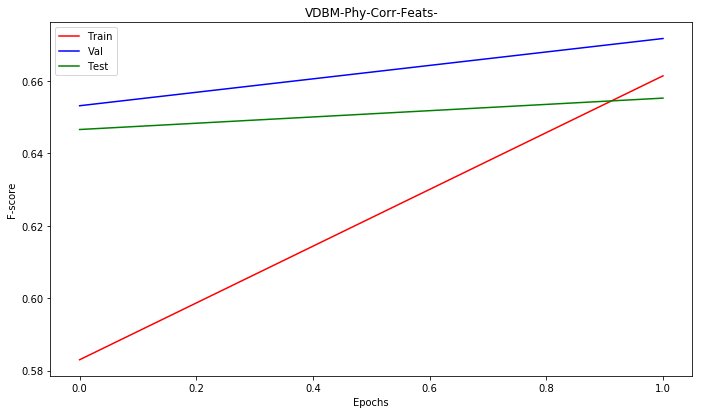

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch1========
TRAIN: (0.6854522366806567, 0.6928883591577275, 0.6614517809176897)
VAL: (0.6772224679345422, 0.6857142857142857, 0.6717589533500727)
TEST: (0.6564494888571886, 0.6683608640406608, 0.6552943848498245)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.659483     0.700438    0.631579    0.705882    0.582569   
Recall       0.332248     0.901003    0.444444    0.837209    0.427609   
F-score      0.441877     0.788161    0.521739    0.765957    0.493204   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.701230  
Recall       0.814286  
F-score      0.753541  
Count      490.000000  
=#==#==#==#==#=2=#==#==#==#==#=


100%|██████████| 2517/2517 [24:14<00:00,  1.73it/s]


==========Epoch No:2==========
Training Loss: 1455.56597242
Train: (0.697645442636854, 0.7048073102900279, 0.6809560212279172, None)
                    0            1
Precision    0.668561     0.714429
Recall       0.383279     0.890351
F-score      0.487233     0.792748
Count      921.000000  1596.000000
--------
Val: (0.6666403419918622, 0.6761904761904762, 0.6582104462701478, None)
                    0           1
Precision    0.622642    0.694268
Recall       0.407407    0.844961
F-score      0.492537    0.762238
Count      243.000000  387.000000
--------
Test: (0.6585804859437255, 0.6709021601016518, 0.6551141531771245, None)
                    0           1
Precision    0.592233    0.698795
Recall       0.410774    0.828571
F-score      0.485089    0.758170
Count      297.000000  490.000000




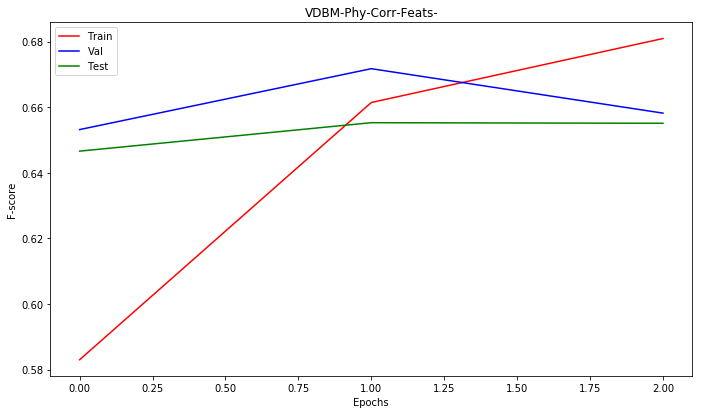

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch1========
TRAIN: (0.6854522366806567, 0.6928883591577275, 0.6614517809176897)
VAL: (0.6772224679345422, 0.6857142857142857, 0.6717589533500727)
TEST: (0.6564494888571886, 0.6683608640406608, 0.6552943848498245)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.659483     0.700438    0.631579    0.705882    0.582569   
Recall       0.332248     0.901003    0.444444    0.837209    0.427609   
F-score      0.441877     0.788161    0.521739    0.765957    0.493204   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.701230  
Recall       0.814286  
F-score      0.753541  
Count      490.000000  
=#==#==#==#==#=3=#==#==#==#==#=


100%|██████████| 2517/2517 [26:59<00:00,  1.55it/s]


==========Epoch No:3==========
Training Loss: 1426.93472606
Train: (0.7029873477069795, 0.7099721891140246, 0.6887581048204454, None)
                    0            1
Precision    0.672694     0.720468
Recall       0.403909     0.886591
F-score      0.504749     0.794944
Count      921.000000  1596.000000
--------
Val: (0.6842334891357273, 0.692063492063492, 0.6809679645081831, None)
                    0           1
Precision    0.635359    0.714922
Recall       0.473251    0.829457
F-score      0.542453    0.767943
Count      243.000000  387.000000
--------
Test: (0.67262326559706, 0.6823379923761118, 0.6721105352038249, None)
                    0           1
Precision    0.602620    0.715054
Recall       0.464646    0.814286
F-score      0.524715    0.761450
Count      297.000000  490.000000




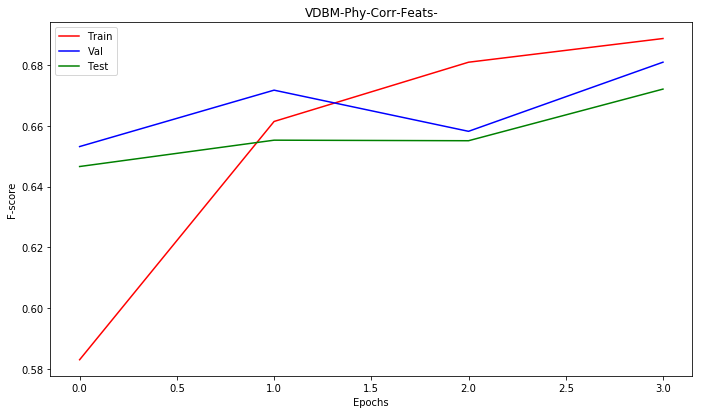

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch3========
TRAIN: (0.7029873477069795, 0.7099721891140246, 0.6887581048204454)
VAL: (0.6842334891357273, 0.692063492063492, 0.6809679645081831)
TEST: (0.67262326559706, 0.6823379923761118, 0.6721105352038249)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.672694     0.720468    0.635359    0.714922    0.602620   
Recall       0.403909     0.886591    0.473251    0.829457    0.464646   
F-score      0.504749     0.794944    0.542453    0.767943    0.524715   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.715054  
Recall       0.814286  
F-score      0.761450  
Count      490.000000  
=#==#==#==#==#=4=#==#==#==#==#=


100%|██████████| 2517/2517 [24:49<00:00,  1.69it/s]


==========Epoch No:4==========
Training Loss: 1408.30979994
Train: (0.7130131217972816, 0.7187127532777116, 0.6994559955021928, None)
                    0            1
Precision    0.687170     0.727926
Recall       0.424539     0.888471
F-score      0.524832     0.800226
Count      921.000000  1596.000000
--------
Val: (0.6935, 0.7, 0.6933349174290127, None)
                    0           1
Precision    0.635000    0.730233
Recall       0.522634    0.811370
F-score      0.573363    0.768666
Count      243.000000  387.000000
--------
Test: (0.664053553052459, 0.6734434561626429, 0.665087037059259, None)
                    0           1
Precision    0.583333    0.712980
Recall       0.471380    0.795918
F-score      0.521415    0.752170
Count      297.000000  490.000000




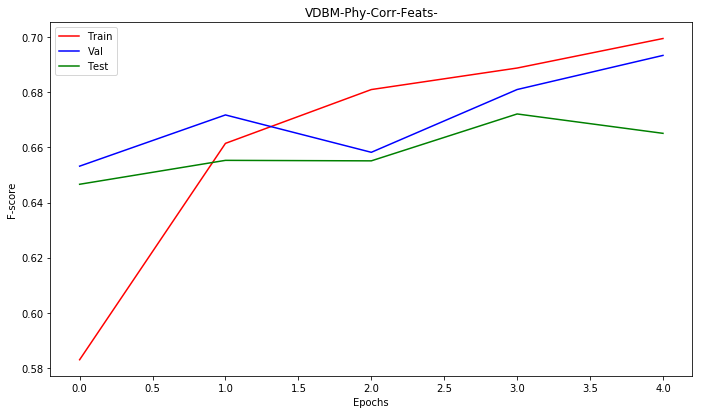

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch4========
TRAIN: (0.7130131217972816, 0.7187127532777116, 0.6994559955021928)
VAL: (0.6935, 0.7, 0.6933349174290127)
TEST: (0.664053553052459, 0.6734434561626429, 0.665087037059259)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.687170     0.727926    0.635000    0.730233    0.583333   
Recall       0.424539     0.888471    0.522634    0.811370    0.471380   
F-score      0.524832     0.800226    0.573363    0.768666    0.521415   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.712980  
Recall       0.795918  
F-score      0.752170  
Count      490.000000  
=#==#==#==#==#=5=#==#==#==#==#=


100%|██████████| 2517/2517 [25:35<00:00,  1.64it/s]


==========Epoch No:5==========
Training Loss: 1389.55282122
Train: (0.714447796751134, 0.7206992451330949, 0.7033812837399739, None)
                    0            1
Precision    0.684122     0.731948
Recall       0.439739     0.882832
F-score      0.535360     0.800341
Count      921.000000  1596.000000
--------
Val: (0.6850247258833112, 0.692063492063492, 0.6850182465312624, None)
                    0           1
Precision    0.623116    0.723898
Recall       0.510288    0.806202
F-score      0.561086    0.762836
Count      243.000000  387.000000
--------
Test: (0.67262326559706, 0.6823379923761118, 0.6721105352038249, None)
                    0           1
Precision    0.602620    0.715054
Recall       0.464646    0.814286
F-score      0.524715    0.761450
Count      297.000000  490.000000




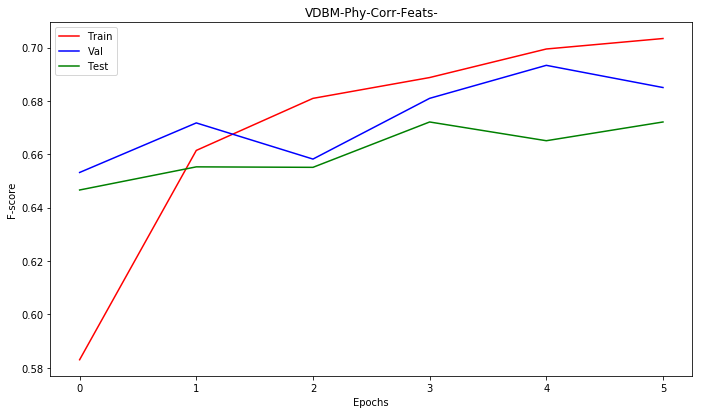

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch4========
TRAIN: (0.7130131217972816, 0.7187127532777116, 0.6994559955021928)
VAL: (0.6935, 0.7, 0.6933349174290127)
TEST: (0.664053553052459, 0.6734434561626429, 0.665087037059259)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.687170     0.727926    0.635000    0.730233    0.583333   
Recall       0.424539     0.888471    0.522634    0.811370    0.471380   
F-score      0.524832     0.800226    0.573363    0.768666    0.521415   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.712980  
Recall       0.795918  
F-score      0.752170  
Count      490.000000  
=#==#==#==#==#=6=#==#==#==#==#=


100%|██████████| 2517/2517 [24:52<00:00,  1.69it/s]


==========Epoch No:6==========
Training Loss: 1370.3415221
Train: (0.7193090139964687, 0.725466825586015, 0.7100571898458303, None)
                    0            1
Precision    0.687296     0.737782
Recall       0.458198     0.879699
F-score      0.549837     0.802515
Count      921.000000  1596.000000
--------
Val: (0.6918951695071097, 0.6984126984126984, 0.6919098720569309, None)
                    0           1
Precision    0.631841    0.729604
Recall       0.522634    0.808786
F-score      0.572072    0.767157
Count      243.000000  387.000000
--------
Test: (0.6715834019719527, 0.6797966963151207, 0.6728533958086756, None)
                    0           1
Precision    0.591093    0.720370
Recall       0.491582    0.793878
F-score      0.536765    0.755340
Count      297.000000  490.000000




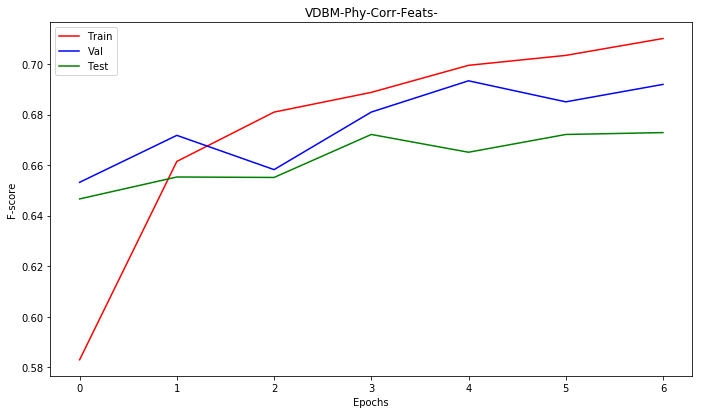

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch4========
TRAIN: (0.7130131217972816, 0.7187127532777116, 0.6994559955021928)
VAL: (0.6935, 0.7, 0.6933349174290127)
TEST: (0.664053553052459, 0.6734434561626429, 0.665087037059259)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.687170     0.727926    0.635000    0.730233    0.583333   
Recall       0.424539     0.888471    0.522634    0.811370    0.471380   
F-score      0.524832     0.800226    0.573363    0.768666    0.521415   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.712980  
Recall       0.795918  
F-score      0.752170  
Count      490.000000  
=#==#==#==#==#=7=#==#==#==#==#=


100%|██████████| 2517/2517 [24:47<00:00,  1.69it/s]


==========Epoch No:7==========
Training Loss: 1352.23770285
Train: (0.7264472160872805, 0.7318235995232419, 0.7173247037597548, None)
                    0            1
Precision    0.697749     0.743008
Recall       0.471227     0.882206
F-score      0.562541     0.806646
Count      921.000000  1596.000000
--------
Val: (0.7023684712861401, 0.707936507936508, 0.7027442680776015, None)
                    0           1
Precision    0.642512    0.739953
Recall       0.547325    0.808786
F-score      0.591111    0.772840
Count      243.000000  387.000000
--------
Test: (0.6610921618383401, 0.6683608640406608, 0.6630550600778282, None)
                    0           1
Precision    0.569767    0.716446
Recall       0.494949    0.773469
F-score      0.529730    0.743867
Count      297.000000  490.000000




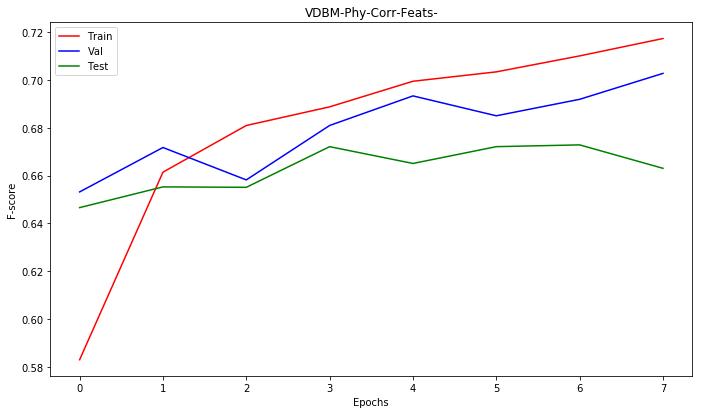

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch7========
TRAIN: (0.7264472160872805, 0.7318235995232419, 0.7173247037597548)
VAL: (0.7023684712861401, 0.707936507936508, 0.7027442680776015)
TEST: (0.6610921618383401, 0.6683608640406608, 0.6630550600778282)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.697749     0.743008    0.642512    0.739953    0.569767   
Recall       0.471227     0.882206    0.547325    0.808786    0.494949   
F-score      0.562541     0.806646    0.591111    0.772840    0.529730   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.716446  
Recall       0.773469  
F-score      0.743867  
Count      490.000000  
=#==#==#==#==#=8=#==#==#==#==#=


100%|██████████| 2517/2517 [25:17<00:00,  1.66it/s]


==========Epoch No:8==========
Training Loss: 1342.53109208
Train: (0.7313328166975994, 0.7361938816050854, 0.7222668797910642, None)
                    0            1
Precision    0.704944     0.746561
Recall       0.479913     0.884085
F-score      0.571059     0.809524
Count      921.000000  1596.000000
--------
Val: (0.702733561385961, 0.707936507936508, 0.7034413078750154, None)
                    0           1
Precision    0.639810    0.742243
Recall       0.555556    0.803618
F-score      0.594714    0.771712
Count      243.000000  387.000000
--------
Test: (0.661399028287087, 0.6696315120711563, 0.663171602642773, None)
                    0           1
Precision    0.573705    0.714552
Recall       0.484848    0.781633
F-score      0.525547    0.746589
Count      297.000000  490.000000




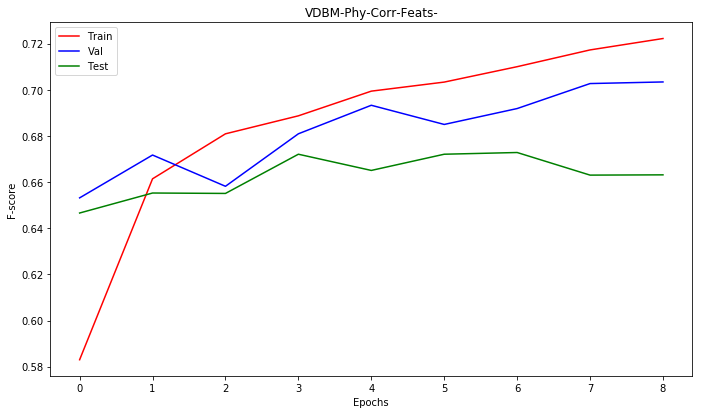

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch8========
TRAIN: (0.7313328166975994, 0.7361938816050854, 0.7222668797910642)
VAL: (0.702733561385961, 0.707936507936508, 0.7034413078750154)
TEST: (0.661399028287087, 0.6696315120711563, 0.663171602642773)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.704944     0.746561    0.639810    0.742243    0.573705   
Recall       0.479913     0.884085    0.555556    0.803618    0.484848   
F-score      0.571059     0.809524    0.594714    0.771712    0.525547   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.714552  
Recall       0.781633  
F-score      0.746589  
Count      490.000000  
=#==#==#==#==#=9=#==#==#==#==#=


100%|██████████| 2517/2517 [25:26<00:00,  1.65it/s]


==========Epoch No:9==========
Training Loss: 1328.71996459
Train: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754, None)
                    0            1
Precision    0.716800     0.750000
Recall       0.486428     0.889098
F-score      0.579560     0.813647
Count      921.000000  1596.000000
--------
Val: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285, None)
                    0           1
Precision    0.651163    0.751807
Recall       0.576132    0.806202
F-score      0.611354    0.778055
Count      243.000000  387.000000
--------
Test: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975, None)
                    0           1
Precision    0.580392    0.719925
Recall       0.498316    0.781633
F-score      0.536232    0.749511
Count      297.000000  490.000000




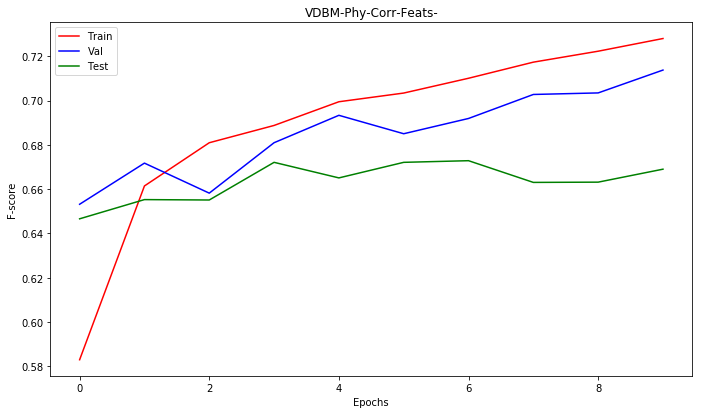

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=10=#==#==#==#==#=


100%|██████████| 2517/2517 [25:07<00:00,  1.67it/s]


==========Epoch No:10==========
Training Loss: 1316.14459851
Train: (0.738775355597943, 0.742947953913389, 0.7299569158597998, None)
                    0            1
Precision    0.715409     0.752259
Recall       0.494028     0.886591
F-score      0.584457     0.813920
Count      921.000000  1596.000000
--------
Val: (0.7071789708924758, 0.7111111111111111, 0.7082546352451915, None)
                    0           1
Precision    0.638009    0.750611
Recall       0.580247    0.793282
F-score      0.607759    0.771357
Count      243.000000  387.000000
--------
Test: (0.6751395769203672, 0.6810673443456162, 0.6768818278147593, None)
                    0           1
Precision    0.587121    0.728489
Recall       0.521886    0.777551
F-score      0.552585    0.752221
Count      297.000000  490.000000




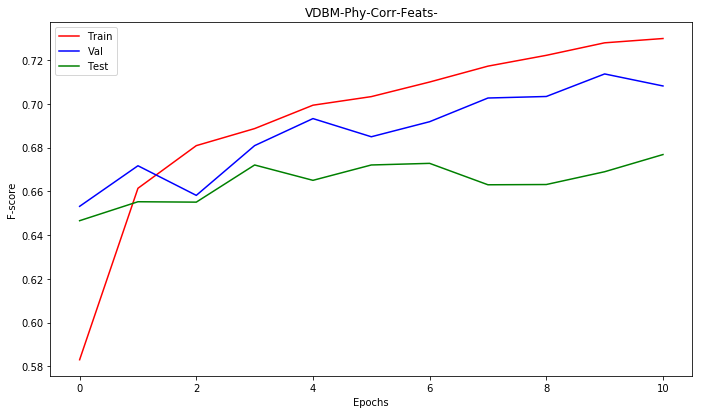

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=11=#==#==#==#==#=


100%|██████████| 2517/2517 [25:05<00:00,  1.67it/s]


==========Epoch No:11==========
Training Loss: 1303.2481226
Train: (0.7509131165869459, 0.754072308303536, 0.742483489189579, None)
                    0            1
Precision    0.732308     0.761650
Recall       0.516830     0.890977
F-score      0.605983     0.821253
Count      921.000000  1596.000000
--------
Val: (0.7021681976560026, 0.7063492063492064, 0.7032926234874145, None)
                    0           1
Precision    0.631818    0.746341
Recall       0.572016    0.790698
F-score      0.600432    0.767880
Count      243.000000  387.000000
--------
Test: (0.6768962801971096, 0.6823379923761118, 0.6786072873150139, None)
                    0           1
Precision    0.588015    0.730769
Recall       0.528620    0.775510
F-score      0.556738    0.752475
Count      297.000000  490.000000




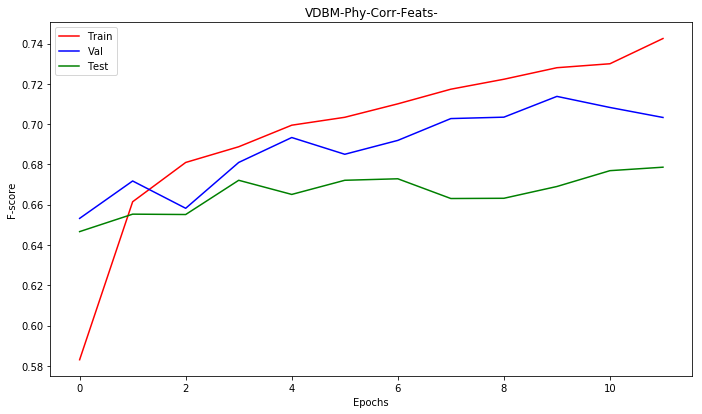

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=12=#==#==#==#==#=


100%|██████████| 2517/2517 [25:15<00:00,  1.66it/s]


==========Epoch No:12==========
Training Loss: 1294.42216644
Train: (0.7502601502801668, 0.7536750099324593, 0.7423614695354681, None)
                    0            1
Precision    0.729771     0.762084
Recall       0.519001     0.889098
F-score      0.606599     0.820706
Count      921.000000  1596.000000
--------
Val: (0.6961453504248921, 0.7015873015873015, 0.6969943797853418, None)
                    0           1
Precision    0.630332    0.737470
Recall       0.547325    0.798450
F-score      0.585903    0.766749
Count      243.000000  387.000000
--------
Test: (0.6696522032945808, 0.6772554002541296, 0.67127958227446, None)
                    0           1
Precision    0.584980    0.720974
Recall       0.498316    0.785714
F-score      0.538182    0.751953
Count      297.000000  490.000000




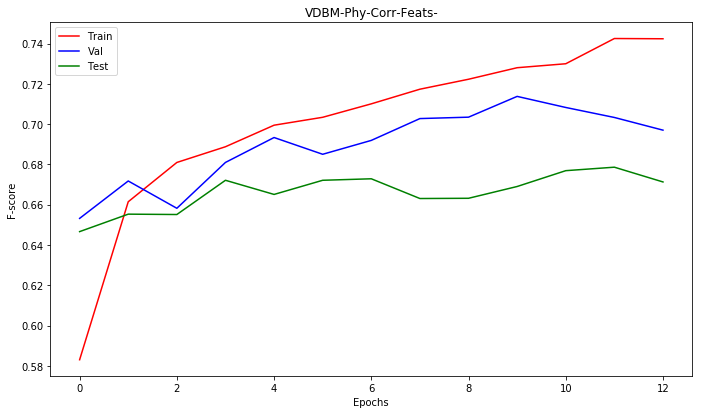

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=13=#==#==#==#==#=


100%|██████████| 2517/2517 [23:51<00:00,  1.76it/s]


==========Epoch No:13==========
Training Loss: 1281.18333536
Train: (0.7485878208172592, 0.7524831148192292, 0.7416380686336592, None)
                    0            1
Precision    0.724398     0.762547
Recall       0.522258     0.885338
F-score      0.606940     0.819368
Count      921.000000  1596.000000
--------
Val: (0.693046270232231, 0.6968253968253968, 0.6942900115996616, None)
                    0           1
Precision    0.616071    0.741379
Recall       0.567901    0.777778
F-score      0.591006    0.759142
Count      243.000000  387.000000
--------
Test: (0.6697222882219662, 0.6747141041931385, 0.671472676192963, None)
                    0           1
Precision    0.575646    0.726744
Recall       0.525253    0.765306
F-score      0.549296    0.745527
Count      297.000000  490.000000




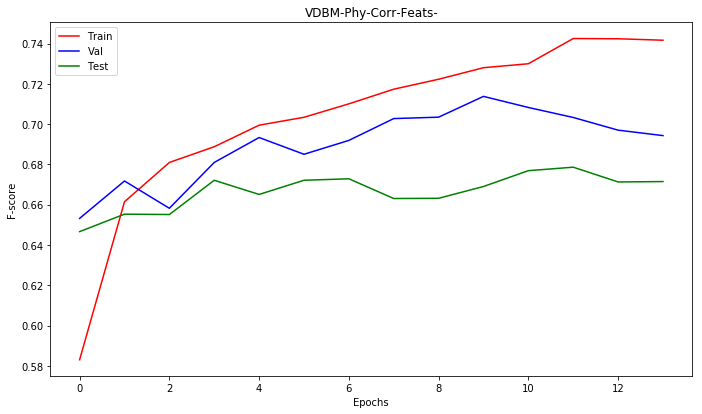

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=14=#==#==#==#==#=


 19%|█▉        | 474/2517 [04:05<17:40,  1.93it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [23:09<00:00,  1.81it/s]


==========Epoch No:14==========
Training Loss: 1259.113094
Train: (0.7627076195939307, 0.7651966626936829, 0.7551259631462451, None)
                    0            1
Precision    0.747006     0.771769
Recall       0.541802     0.894110
F-score      0.628068     0.828447
Count      921.000000  1596.000000
--------
Val: (0.7041008614501078, 0.7063492063492064, 0.705006465207605, None)
                    0           1
Precision    0.625000    0.753769
Recall       0.596708    0.775194
F-score      0.610526    0.764331
Count      243.000000  387.000000
--------
Test: (0.6703982639741171, 0.6734434561626429, 0.6716749306043288, None)
                    0           1
Precision    0.570922    0.730693
Recall       0.542088    0.753061
F-score      0.556131    0.741709
Count      297.000000  490.000000




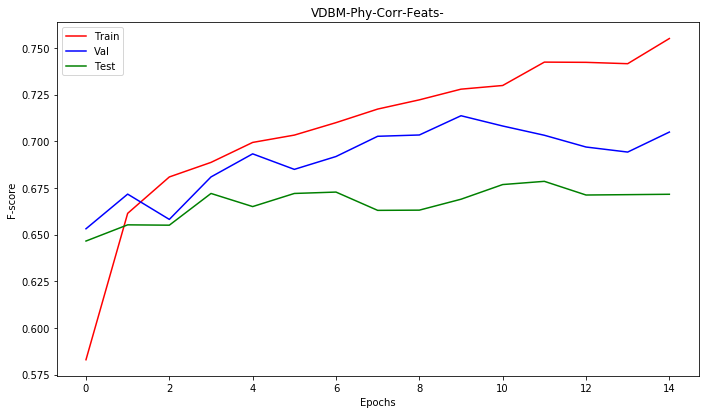

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=15=#==#==#==#==#=


100%|██████████| 2517/2517 [23:12<00:00,  1.81it/s]


==========Epoch No:15==========
Training Loss: 1253.90601155
Train: (0.7551631266726244, 0.7580452920143027, 0.7469898341994425, None)
                    0            1
Precision    0.737805     0.765180
Recall       0.525516     0.892231
F-score      0.613824     0.823836
Count      921.000000  1596.000000
--------
Val: (0.7039317363206332, 0.707936507936508, 0.7050486422259079, None)
                    0           1
Precision    0.633484    0.748166
Recall       0.576132    0.790698
F-score      0.603448    0.768844
Count      243.000000  387.000000
--------
Test: (0.671189661453212, 0.6759847522236341, 0.67289670721077, None)
                    0           1
Precision    0.577206    0.728155
Recall       0.528620    0.765306
F-score      0.551845    0.746269
Count      297.000000  490.000000




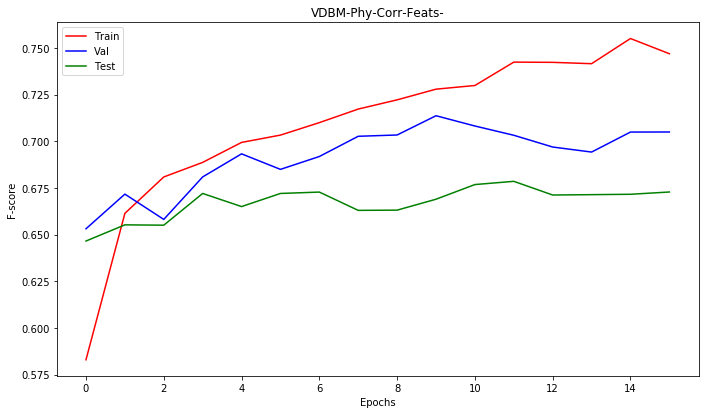

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=16=#==#==#==#==#=


100%|██████████| 2517/2517 [23:06<00:00,  1.82it/s]


==========Epoch No:16==========
Training Loss: 1247.52875456
Train: (0.7566272279080475, 0.7596344854986095, 0.749102779331242, None)
                    0            1
Precision    0.737952     0.767404
Recall       0.532030     0.890977
F-score      0.618297     0.824587
Count      921.000000  1596.000000
--------
Val: (0.6998903254212865, 0.7047619047619048, 0.7008909417037569, None)
                    0           1
Precision    0.632558    0.742169
Recall       0.559671    0.795866
F-score      0.593886    0.768080
Count      243.000000  387.000000
--------
Test: (0.6801012638583082, 0.6861499364675985, 0.6817357846888441, None)
                    0           1
Precision    0.595420    0.731429
Recall       0.525253    0.783673
F-score      0.558140    0.756650
Count      297.000000  490.000000




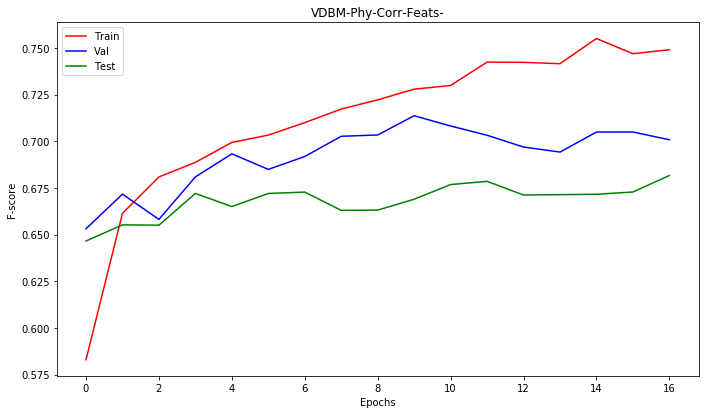

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=17=#==#==#==#==#=


100%|██████████| 2517/2517 [23:16<00:00,  1.80it/s]


==========Epoch No:17==========
Training Loss: 1244.8009021
Train: (0.7528405363114816, 0.7564560985299961, 0.7461224243350084, None)
                    0            1
Precision    0.729851     0.766107
Recall       0.530945     0.886591
F-score      0.614708     0.821958
Count      921.000000  1596.000000
--------
Val: (0.7012765012765012, 0.7031746031746032, 0.7020802566671143, None)
                    0           1
Precision    0.619658    0.752525
Recall       0.596708    0.770026
F-score      0.607966    0.761175
Count      243.000000  387.000000
--------
Test: (0.6681816043588615, 0.6721728081321474, 0.6697398049311768, None)
                    0           1
Precision    0.570397    0.727451
Recall       0.531987    0.757143
F-score      0.550523    0.742000
Count      297.000000  490.000000




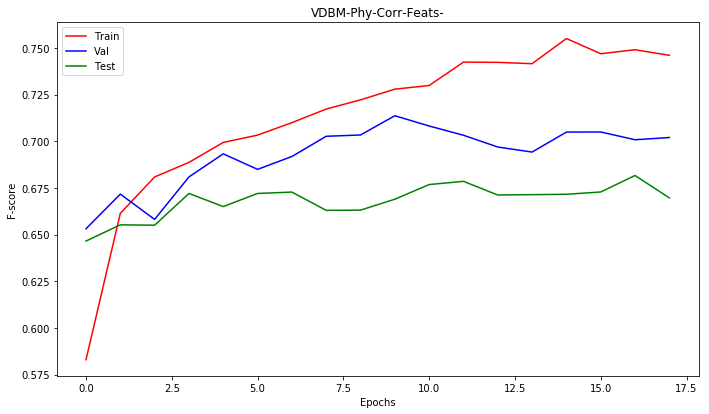

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=18=#==#==#==#==#=


100%|██████████| 2517/2517 [23:41<00:00,  1.77it/s]


==========Epoch No:18==========
Training Loss: 1229.25009099
Train: (0.7734127667268139, 0.7751291219705999, 0.7659456136624483, None)
                    0            1
Precision    0.762186     0.779891
Recall       0.560261     0.899123
F-score      0.645807     0.835274
Count      921.000000  1596.000000
--------
Val: (0.7087328711388862, 0.7111111111111111, 0.7096595484265791, None)
                    0           1
Precision    0.632035    0.756892
Recall       0.600823    0.780362
F-score      0.616034    0.768448
Count      243.000000  387.000000
--------
Test: (0.6675971604363996, 0.6734434561626429, 0.6694595550247044, None)
                    0           1
Precision    0.575188    0.723608
Recall       0.515152    0.769388
F-score      0.543517    0.745796
Count      297.000000  490.000000




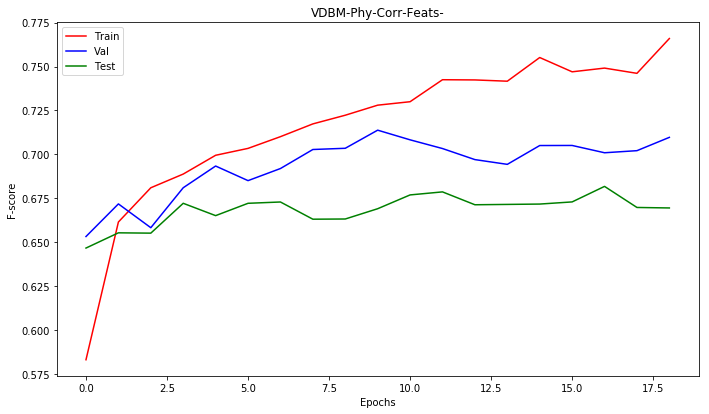

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=19=#==#==#==#==#=


100%|██████████| 2517/2517 [23:47<00:00,  1.76it/s]


==========Epoch No:19==========
Training Loss: 1216.53375494
Train: (0.7721297101102027, 0.7739372268573699, 0.7646540096040517, None)
                    0            1
Precision    0.760355     0.778924
Recall       0.558089     0.898496
F-score      0.643707     0.834449
Count      921.000000  1596.000000
--------
Val: (0.6830320699708455, 0.6825396825396826, 0.6827789979493029, None)
                    0           1
Precision    0.587755    0.742857
Recall       0.592593    0.739018
F-score      0.590164    0.740933
Count      243.000000  387.000000
--------
Test: (0.6700731456874356, 0.6696315120711563, 0.6698480215247543, None)
                    0           1
Precision    0.561873    0.735656
Recall       0.565657    0.732653
F-score      0.563758    0.734151
Count      297.000000  490.000000




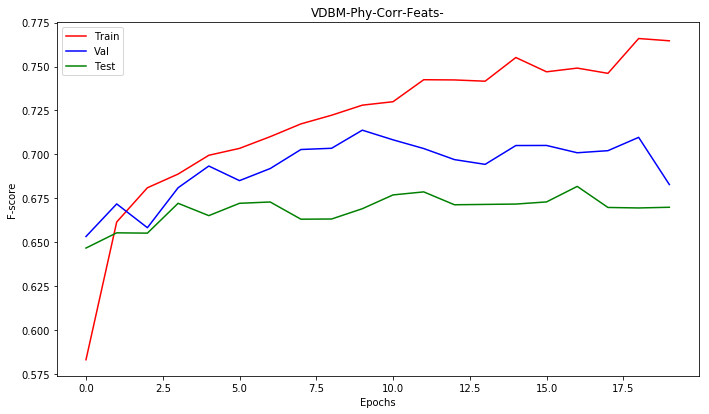

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=20=#==#==#==#==#=


100%|██████████| 2517/2517 [23:07<00:00,  1.81it/s]


==========Epoch No:20==========
Training Loss: 1195.87026879
Train: (0.7770539431440551, 0.7791021056813667, 0.7709586002318163, None)
                    0            1
Precision    0.762590     0.785401
Recall       0.575461     0.896617
F-score      0.655941     0.837332
Count      921.000000  1596.000000
--------
Val: (0.6894769391009993, 0.692063492063492, 0.6905162219492106, None)
                    0           1
Precision    0.606061    0.741855
Recall       0.576132    0.764858
F-score      0.590717    0.753181
Count      243.000000  387.000000
--------
Test: (0.6698996722554124, 0.6759847522236341, 0.6717325342341179, None)
                    0           1
Precision    0.579545    0.724665
Recall       0.515152    0.773469
F-score      0.545455    0.748272
Count      297.000000  490.000000




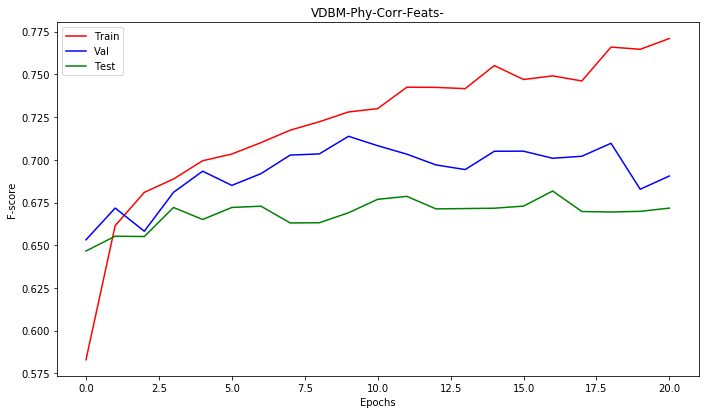

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=21=#==#==#==#==#=


100%|██████████| 2517/2517 [23:05<00:00,  1.82it/s]


==========Epoch No:21==========
Training Loss: 1185.98537585
Train: (0.7804138092612889, 0.7818831942789034, 0.7735095544181608, None)
                    0            1
Precision    0.770349     0.786222
Recall       0.575461     0.901003
F-score      0.658794     0.839708
Count      921.000000  1596.000000
--------
Val: (0.7015873015873015, 0.7015873015873015, 0.7015873015873016, None)
                    0           1
Precision    0.613169    0.757106
Recall       0.613169    0.757106
F-score      0.613169    0.757106
Count      243.000000  387.000000
--------
Test: (0.674441965009536, 0.6772554002541296, 0.6756330561029058, None)
                    0           1
Precision    0.575972    0.734127
Recall       0.548822    0.755102
F-score      0.562069    0.744467
Count      297.000000  490.000000




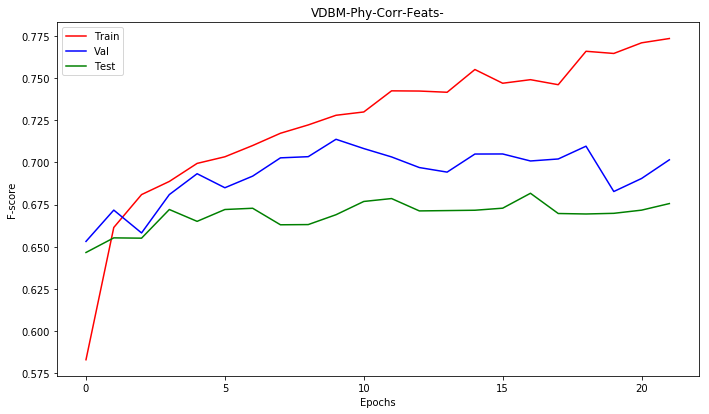

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=22=#==#==#==#==#=


100%|██████████| 2517/2517 [23:11<00:00,  1.81it/s]


==========Epoch No:22==========
Training Loss: 1170.13893539
Train: (0.7815062297332857, 0.7834723877632102, 0.775906541566942, None)
                    0            1
Precision    0.767045     0.789851
Recall       0.586319     0.897243
F-score      0.664615     0.840129
Count      921.000000  1596.000000
--------
Val: (0.6953759398496241, 0.6936507936507936, 0.6944277436731111, None)
                    0           1
Precision    0.600000    0.755263
Recall       0.617284    0.741602
F-score      0.608519    0.748370
Count      243.000000  387.000000
--------
Test: (0.6608499419885386, 0.6594663278271918, 0.6601201245078522, None)
                    0           1
Precision    0.547855    0.729339
Recall       0.558923    0.720408
F-score      0.553333    0.724846
Count      297.000000  490.000000




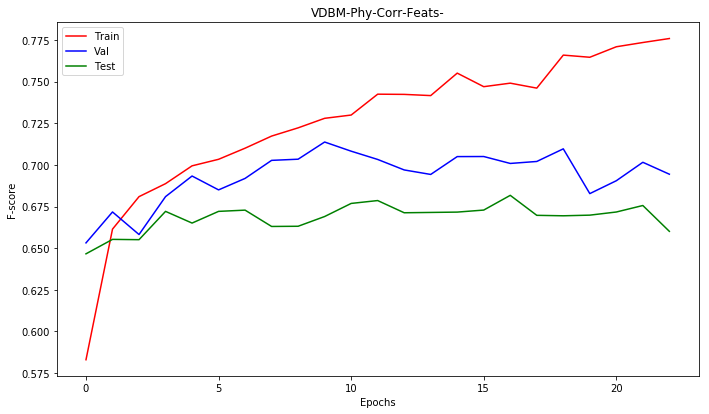

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=23=#==#==#==#==#=


100%|██████████| 2517/2517 [23:05<00:00,  1.82it/s]


==========Epoch No:23==========
Training Loss: 1170.58545682
Train: (0.7862037640053618, 0.7882399682161303, 0.7814570619566171, None)
                    0            1
Precision    0.770195     0.795442
Recall       0.600434     0.896617
F-score      0.674802     0.843004
Count      921.000000  1596.000000
--------
Val: (0.6830320699708455, 0.6825396825396826, 0.6827789979493029, None)
                    0           1
Precision    0.587755    0.742857
Recall       0.592593    0.739018
F-score      0.590164    0.740933
Count      243.000000  387.000000
--------
Test: (0.6745487993647021, 0.6734434561626429, 0.6739690554969302, None)
                    0           1
Precision    0.566225    0.740206
Recall       0.575758    0.732653
F-score      0.570952    0.736410
Count      297.000000  490.000000




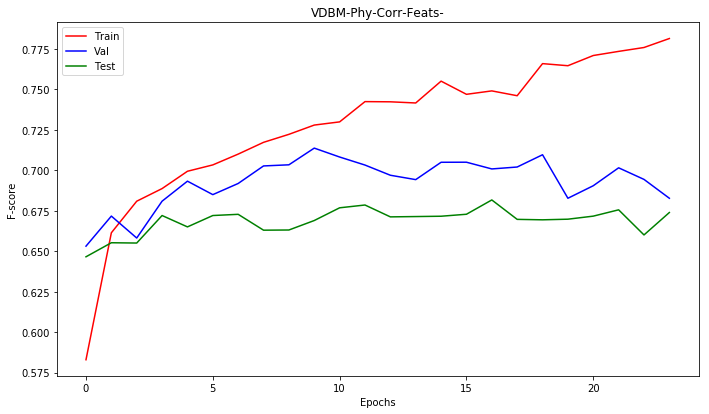

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=24=#==#==#==#==#=


100%|██████████| 2517/2517 [22:23<00:00,  1.87it/s]


==========Epoch No:24==========
Training Loss: 1157.94854507
Train: (0.7870656268612429, 0.7882399682161303, 0.780479033641263, None)
                    0            1
Precision    0.778736     0.791873
Recall       0.588491     0.903509
F-score      0.670377     0.844015
Count      921.000000  1596.000000
--------
Val: (0.6943697372241581, 0.6936507936507936, 0.6939945050135784, None)
                    0           1
Precision    0.601626    0.752604
Recall       0.609053    0.746770
F-score      0.605317    0.749676
Count      243.000000  387.000000
--------
Test: (0.6614191338198496, 0.6607369758576874, 0.6610685208630986, None)
                    0           1
Precision    0.550000    0.728953
Recall       0.555556    0.724490
F-score      0.552764    0.726714
Count      297.000000  490.000000




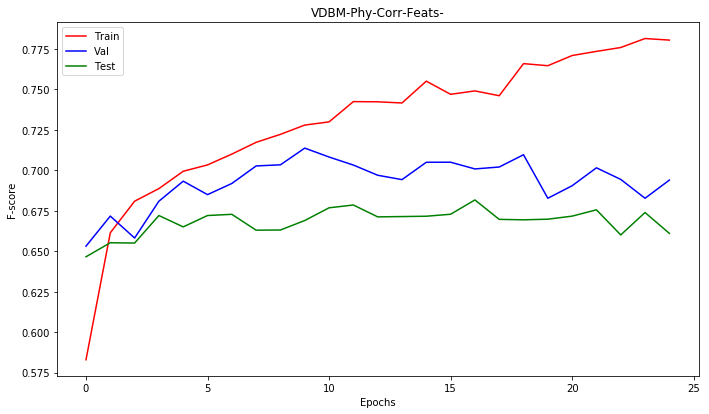

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=25=#==#==#==#==#=


100%|██████████| 2517/2517 [22:54<00:00,  1.83it/s]


==========Epoch No:25==========
Training Loss: 1139.09584084
Train: (0.7994825140485496, 0.8001589193484306, 0.793427834941988, None)
                    0            1
Precision    0.794366     0.802435
Recall       0.612378     0.908521
F-score      0.691600     0.852189
Count      921.000000  1596.000000
--------
Val: (0.6990551776266062, 0.6968253968253968, 0.6977981495628556, None)
                    0           1
Precision    0.603175    0.759259
Recall       0.625514    0.741602
F-score      0.614141    0.750327
Count      243.000000  387.000000
--------
Test: (0.6552442240834497, 0.6531130876747141, 0.6540941841265617, None)
                    0           1
Precision    0.539216    0.725572
Recall       0.555556    0.712245
F-score      0.547264    0.718847
Count      297.000000  490.000000




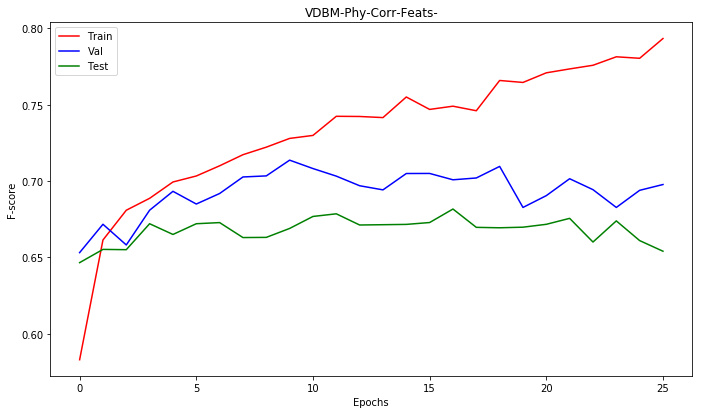

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=26=#==#==#==#==#=


100%|██████████| 2517/2517 [23:15<00:00,  1.80it/s]


==========Epoch No:26==========
Training Loss: 1126.73605904
Train: (0.7978017883558416, 0.7989670242352006, 0.792568754011449, None)
                    0            1
Precision    0.788595     0.803115
Recall       0.615635     0.904762
F-score      0.691463     0.850913
Count      921.000000  1596.000000
--------
Val: (0.690377257059735, 0.6888888888888889, 0.6895706300813008, None)
                    0           1
Precision    0.594378    0.750656
Recall       0.609053    0.739018
F-score      0.601626    0.744792
Count      243.000000  387.000000
--------
Test: (0.6578474559096356, 0.6569250317662008, 0.6573694172108262, None)
                    0           1
Precision    0.544850    0.726337
Recall       0.552189    0.720408
F-score      0.548495    0.723361
Count      297.000000  490.000000




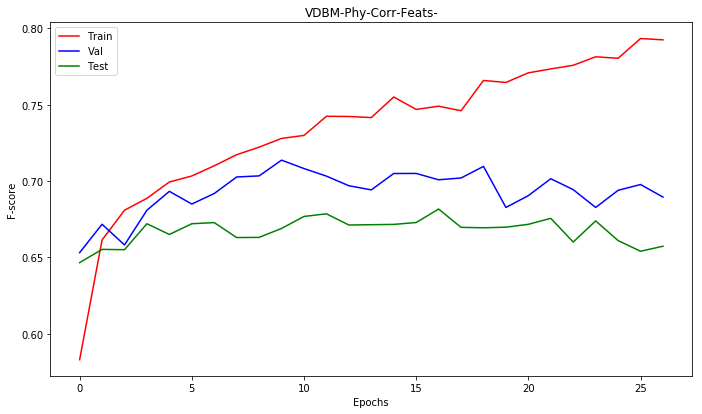

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=27=#==#==#==#==#=


100%|██████████| 2517/2517 [23:04<00:00,  1.82it/s]


==========Epoch No:27==========
Training Loss: 1110.92428443
Train: (0.8094201839181909, 0.8100913786253476, 0.8044296283659254, None)
                    0            1
Precision    0.803841     0.812640
Recall       0.636265     0.910401
F-score      0.710303     0.858747
Count      921.000000  1596.000000
--------
Val: (0.6899770004891299, 0.6857142857142857, 0.687405823370671, None)
                    0           1
Precision    0.586873    0.754717
Recall       0.625514    0.723514
F-score      0.605578    0.738786
Count      243.000000  387.000000
--------
Test: (0.6689111814347268, 0.6670902160101652, 0.6679322420418855, None)
                    0           1
Precision    0.557377    0.736515
Recall       0.572391    0.724490
F-score      0.564784    0.730453
Count      297.000000  490.000000




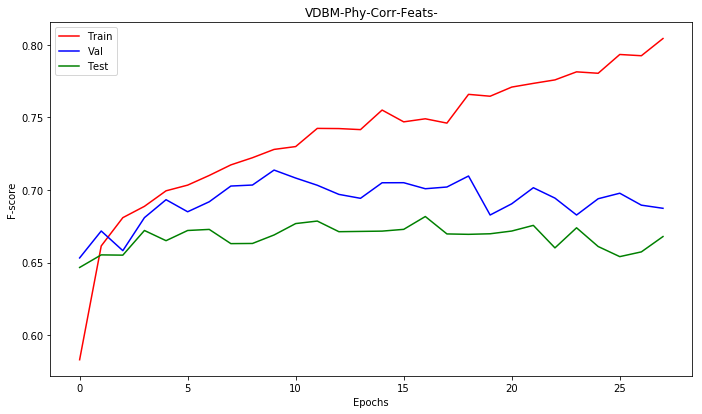

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=28=#==#==#==#==#=


100%|██████████| 2517/2517 [22:57<00:00,  1.83it/s]


==========Epoch No:28==========
Training Loss: 1108.1713711
Train: (0.8071890727213304, 0.8077075883988876, 0.8016657208768622, None)
                    0            1
Precision    0.803051     0.809577
Recall       0.628664     0.911028
F-score      0.705238     0.857311
Count      921.000000  1596.000000
--------
Val: (0.6827383458646615, 0.680952380952381, 0.6817615361569707, None)
                    0           1
Precision    0.584000    0.744737
Recall       0.600823    0.731266
F-score      0.592292    0.737940
Count      243.000000  387.000000
--------
Test: (0.6741012187262732, 0.6734434561626429, 0.673762583752121, None)
                    0           1
Precision    0.566667    0.739220
Recall       0.572391    0.734694
F-score      0.569514    0.736950
Count      297.000000  490.000000




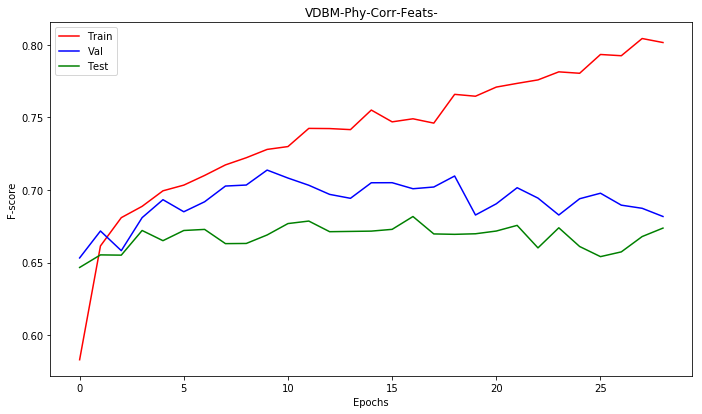

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=29=#==#==#==#==#=


100%|██████████| 2517/2517 [22:28<00:00,  1.87it/s]


==========Epoch No:29==========
Training Loss: 1095.91927803
Train: (0.8092056497414216, 0.8096940802542709, 0.803830031966883, None)
                    0            1
Precision    0.805249     0.811489
Recall       0.633008     0.911654
F-score      0.708815     0.858660
Count      921.000000  1596.000000
--------
Val: (0.6963020351255403, 0.6873015873015873, 0.6901531731920324, None)
                    0           1
Precision    0.583942    0.766854
Recall       0.658436    0.705426
F-score      0.618956    0.734859
Count      243.000000  387.000000
--------
Test: (0.6680900759944098, 0.6594663278271918, 0.6625650691445829, None)
                    0           1
Precision    0.543807    0.743421
Recall       0.606061    0.691837
F-score      0.573248    0.716702
Count      297.000000  490.000000




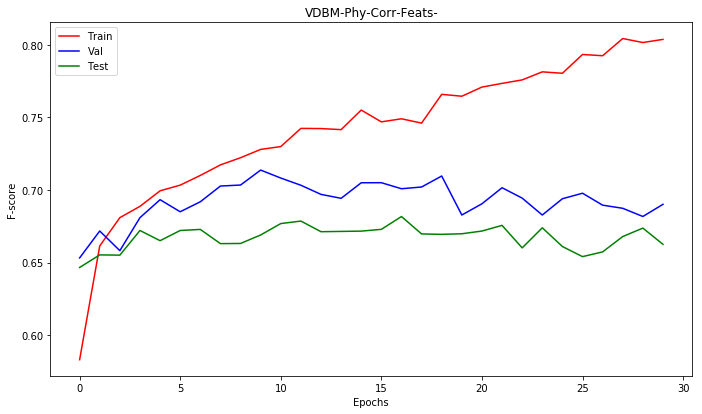

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=30=#==#==#==#==#=


100%|██████████| 2517/2517 [22:19<00:00,  1.88it/s]


==========Epoch No:30==========
Training Loss: 1094.10415411
Train: (0.8182753314045624, 0.8180373460468812, 0.8123936945840822, None)
                    0            1
Precision    0.820194     0.817168
Recall       0.643865     0.918546
F-score      0.721411     0.864897
Count      921.000000  1596.000000
--------
Val: (0.6888336134453782, 0.6857142857142857, 0.6870261699215309, None)
                    0           1
Precision    0.588235    0.752000
Recall       0.617284    0.728682
F-score      0.602410    0.740157
Count      243.000000  387.000000
--------
Test: (0.6587772909223785, 0.6607369758576874, 0.6596709241990306, None)
                    0           1
Precision    0.552083    0.723447
Recall       0.535354    0.736735
F-score      0.543590    0.730030
Count      297.000000  490.000000




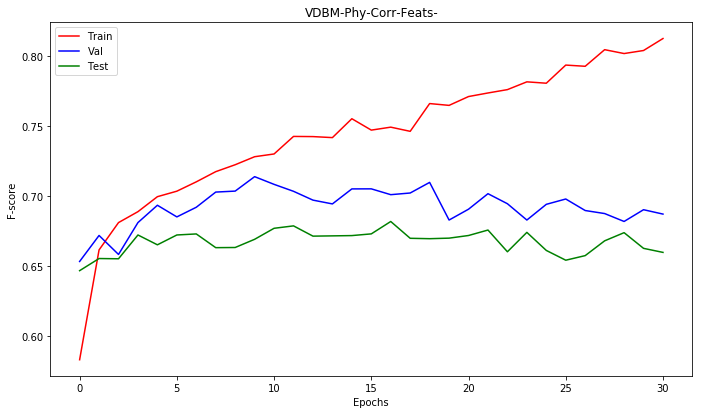

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=31=#==#==#==#==#=


100%|██████████| 2517/2517 [22:14<00:00,  1.89it/s]


==========Epoch No:31==========
Training Loss: 1084.86132705
Train: (0.8200200992372124, 0.8204211362733412, 0.8154896792385669, None)
                    0            1
Precision    0.816464     0.822072
Recall       0.656895     0.914787
F-score      0.728039     0.865955
Count      921.000000  1596.000000
--------
Val: (0.6938383307868603, 0.6904761904761905, 0.6918642992762322, None)
                    0           1
Precision    0.593750    0.756684
Recall       0.625514    0.731266
F-score      0.609218    0.743758
Count      243.000000  387.000000
--------
Test: (0.6597677692903309, 0.6569250317662008, 0.6581953158929152, None)
                    0           1
Precision    0.543689    0.730126
Recall       0.565657    0.712245
F-score      0.554455    0.721074
Count      297.000000  490.000000




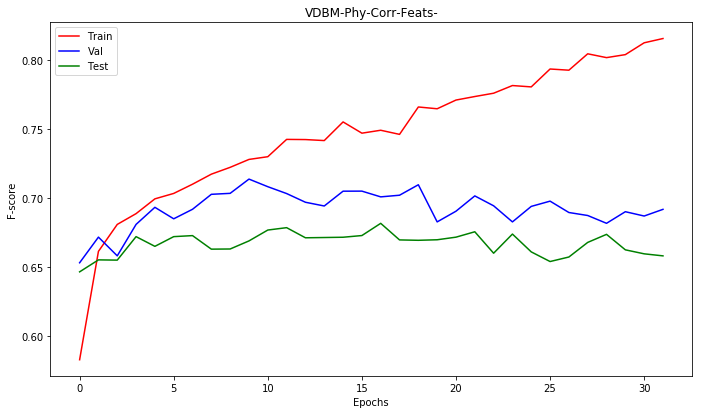

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=32=#==#==#==#==#=


100%|██████████| 2517/2517 [21:36<00:00,  1.94it/s]


==========Epoch No:32==========
Training Loss: 1067.88862655
Train: (0.8235108673674971, 0.8235995232419547, 0.8186870658316628, None)
                    0            1
Precision    0.822733     0.823960
Recall       0.660152     0.917920
F-score      0.732530     0.868405
Count      921.000000  1596.000000
--------
Val: (0.6908997256357157, 0.6888888888888889, 0.689783406095073, None)
                    0           1
Precision    0.593625    0.751979
Recall       0.613169    0.736434
F-score      0.603239    0.744125
Count      243.000000  387.000000
--------
Test: (0.6621824764502873, 0.6632782719186785, 0.6627036862218498, None)
                    0           1
Precision    0.554795    0.727273
Recall       0.545455    0.734694
F-score      0.550085    0.730964
Count      297.000000  490.000000




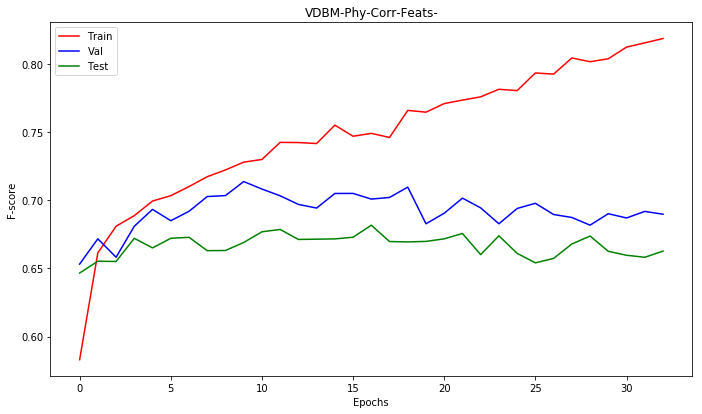

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=33=#==#==#==#==#=


100%|██████████| 2517/2517 [15:49<00:00,  2.65it/s]


==========Epoch No:33==========
Training Loss: 1064.13337541
Train: (0.8214248023025407, 0.8216130313865713, 0.8166105977045461, None)
                    0            1
Precision    0.819783     0.822372
Recall       0.656895     0.916667
F-score      0.729355     0.866963
Count      921.000000  1596.000000
--------
Val: (0.6905683046978253, 0.6857142857142857, 0.6875850340136055, None)
                    0           1
Precision    0.586207    0.756098
Recall       0.629630    0.720930
F-score      0.607143    0.738095
Count      243.000000  387.000000
--------
Test: (0.6724732059002265, 0.6709021601016518, 0.6716348980829673, None)
                    0           1
Precision    0.562500    0.739130
Recall       0.575758    0.728571
F-score      0.569052    0.733813
Count      297.000000  490.000000




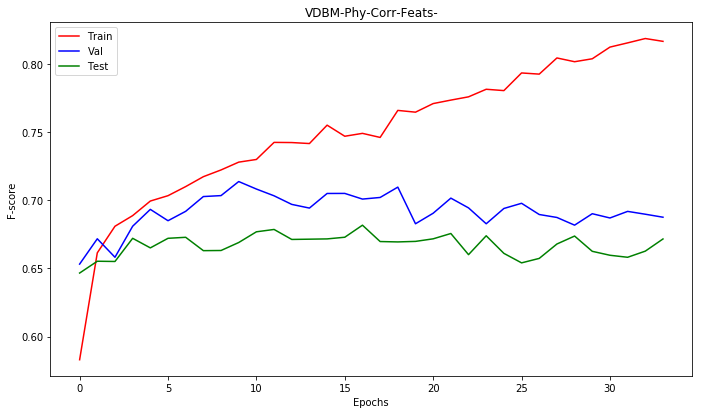

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=34=#==#==#==#==#=


100%|██████████| 2517/2517 [15:45<00:00,  2.66it/s]


==========Epoch No:34==========
Training Loss: 1050.97270259
Train: (0.821696820348726, 0.8216130313865713, 0.8164008364767404, None)
                    0            1
Precision    0.822404     0.821289
Recall       0.653637     0.918546
F-score      0.728373     0.867199
Count      921.000000  1596.000000
--------
Val: (0.6919843137254902, 0.6888888888888889, 0.6901875217405052, None)
                    0           1
Precision    0.592157    0.754667
Recall       0.621399    0.731266
F-score      0.606426    0.742782
Count      243.000000  387.000000
--------
Test: (0.6614191338198496, 0.6607369758576874, 0.6610685208630986, None)
                    0           1
Precision    0.550000    0.728953
Recall       0.555556    0.724490
F-score      0.552764    0.726714
Count      297.000000  490.000000




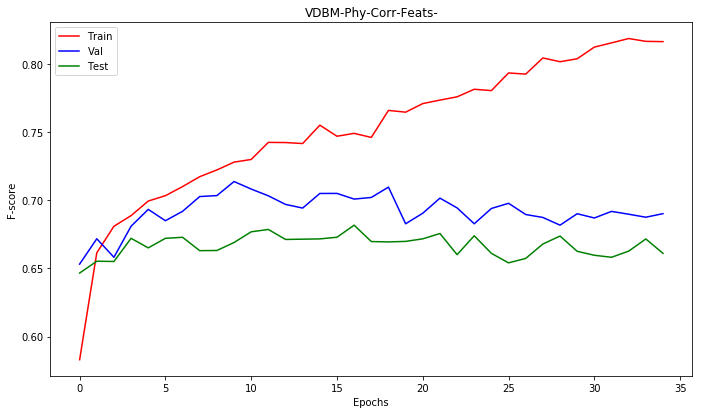

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=35=#==#==#==#==#=


100%|██████████| 2517/2517 [15:37<00:00,  2.69it/s]


==========Epoch No:35==========
Training Loss: 1031.87684861
Train: (0.8358108212343865, 0.8351211760031784, 0.8305615287361606, None)
                    0            1
Precision    0.841892     0.832302
Recall       0.676439     0.926692
F-score      0.750151     0.876964
Count      921.000000  1596.000000
--------
Val: (0.687742208700066, 0.6857142857142857, 0.6866179306470636, None)
                    0           1
Precision    0.589641    0.749340
Recall       0.609053    0.733850
F-score      0.599190    0.741514
Count      243.000000  387.000000
--------
Test: (0.6598209413650694, 0.6581956797966964, 0.6589567088197611, None)
                    0           1
Precision    0.546053    0.728778
Recall       0.558923    0.718367
F-score      0.552413    0.723535
Count      297.000000  490.000000




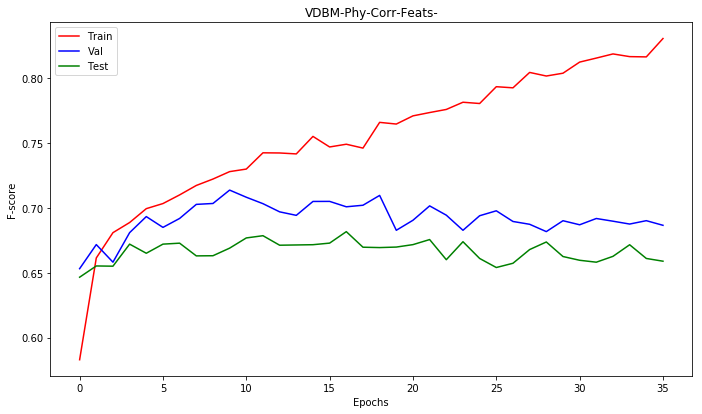

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=36=#==#==#==#==#=


 30%|███       | 765/2517 [04:38<10:37,  2.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [15:24<00:00,  2.72it/s]


==========Epoch No:37==========
Training Loss: 1017.91742152
Train: (0.8429927722475241, 0.841875248311482, 0.8375329476481186, None)
                    0            1
Precision    0.852901     0.837275
Recall       0.686211     0.931704
F-score      0.760529     0.881969
Count      921.000000  1596.000000
--------
Val: (0.6842831778071475, 0.6793650793650794, 0.6812736205593348, None)
                    0           1
Precision    0.578544    0.750678
Recall       0.621399    0.715762
F-score      0.599206    0.732804
Count      243.000000  387.000000
--------
Test: (0.6673152456700548, 0.6632782719186785, 0.6649905142642186, None)
                    0           1
Precision    0.550955    0.737844
Recall       0.582492    0.712245
F-score      0.566285    0.724818
Count      297.000000  490.000000




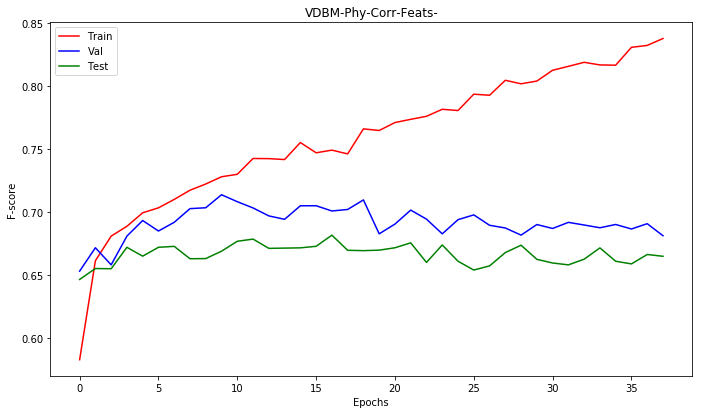

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=38=#==#==#==#==#=


 52%|█████▏    | 1321/2517 [08:27<07:39,  2.60it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [15:43<00:00,  2.67it/s]


==========Epoch No:39==========
Training Loss: 990.905919969
Train: (0.8500347694373548, 0.8482320222487088, 0.8439464958958938, None)
                    0            1
Precision    0.865672     0.841011
Recall       0.692725     0.937970
F-score      0.769602     0.886848
Count      921.000000  1596.000000
--------
Val: (0.6875426217373894, 0.6873015873015873, 0.687420370019699, None)
                    0           1
Precision    0.594262    0.746114
Recall       0.596708    0.744186
F-score      0.595483    0.745149
Count      243.000000  387.000000
--------
Test: (0.6522295826439753, 0.650571791613723, 0.6513497952618376, None)
                    0           1
Precision    0.536184    0.722567
Recall       0.548822    0.712245
F-score      0.542429    0.717369
Count      297.000000  490.000000




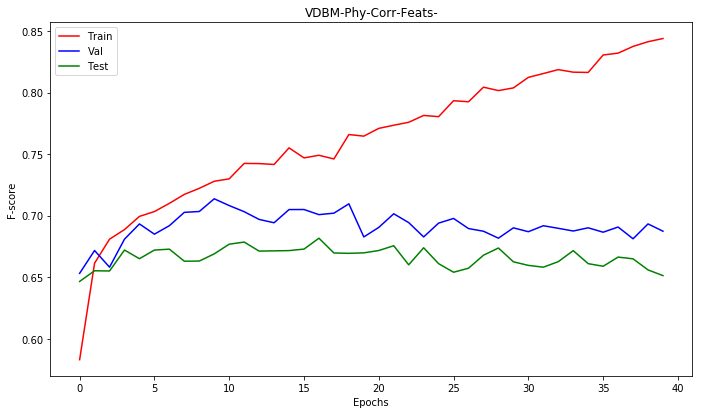

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=40=#==#==#==#==#=


 56%|█████▌    | 1401/2517 [09:21<07:26,  2.50it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [17:10<00:00,  2.44it/s]


==========Epoch No:41==========
Training Loss: 958.395668
Train: (0.8547588474914322, 0.8541914978148589, 0.8509220166134825, None)
                    0            1
Precision    0.860677     0.851344
Recall       0.717698     0.932957
F-score      0.782712     0.890284
Count      921.000000  1596.000000
--------
Val: (0.6880323600933624, 0.6825396825396826, 0.6846032528191449, None)
                    0           1
Precision    0.581749    0.754768
Recall       0.629630    0.715762
F-score      0.604743    0.734748
Count      243.000000  387.000000
--------
Test: (0.6668149946756247, 0.6632782719186785, 0.6648080829806882, None)
                    0           1
Precision    0.551282    0.736842
Recall       0.579125    0.714286
F-score      0.564860    0.725389
Count      297.000000  490.000000




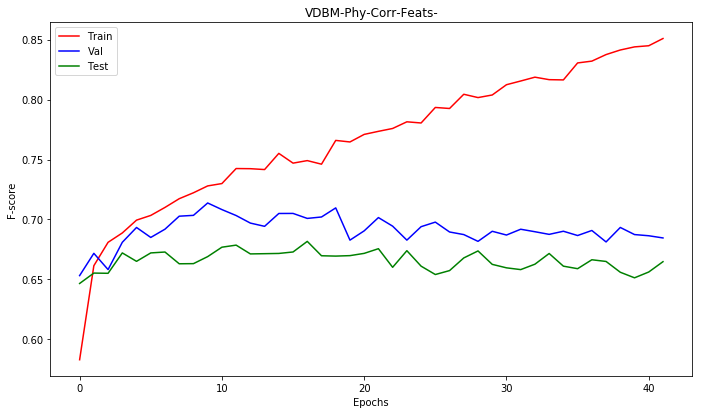

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=42=#==#==#==#==#=


 31%|███       | 777/2517 [05:17<11:50,  2.45it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [16:51<00:00,  2.49it/s]


==========Epoch No:43==========
Training Loss: 938.844786793
Train: (0.8608260820652337, 0.8597536750099325, 0.8565072945490478, None)
                    0            1
Precision    0.871728     0.854535
Recall       0.723127     0.938596
F-score      0.790504     0.894595
Count      921.000000  1596.000000
--------
Val: (0.6845846917644162, 0.6825396825396826, 0.6834524551990541, None)
                    0           1
Precision    0.585657    0.746702
Recall       0.604938    0.731266
F-score      0.595142    0.738903
Count      243.000000  387.000000
--------
Test: (0.6658349158010938, 0.6632782719186785, 0.664428161298748, None)
                    0           1
Precision    0.551948    0.734864
Recall       0.572391    0.718367
F-score      0.561983    0.726522
Count      297.000000  490.000000




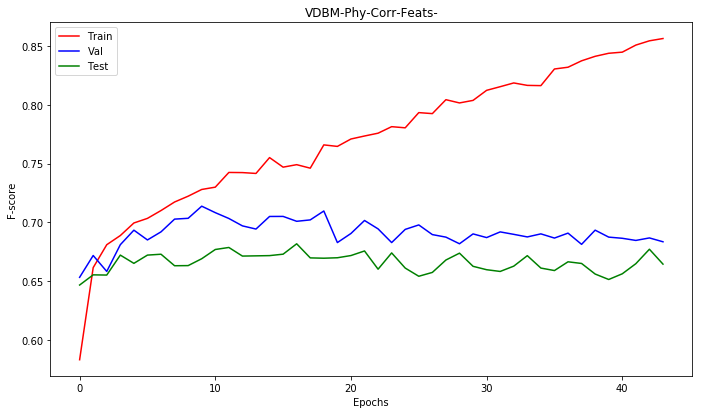

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=44=#==#==#==#==#=


 72%|███████▏  | 1814/2517 [11:52<04:36,  2.55it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [16:51<00:00,  2.49it/s]


==========Epoch No:45==========
Training Loss: 914.587152511
Train: (0.866780018367462, 0.8661104489471593, 0.8633932819595724, None)
                    0            1
Precision    0.874359     0.862406
Recall       0.740499     0.938596
F-score      0.801881     0.898890
Count      921.000000  1596.000000
--------
Val: (0.6899770004891299, 0.6857142857142857, 0.687405823370671, None)
                    0           1
Precision    0.586873    0.754717
Recall       0.625514    0.723514
F-score      0.605578    0.738786
Count      243.000000  387.000000
--------
Test: (0.6674123000861637, 0.6658195679796697, 0.6665636223776847, None)
                    0           1
Precision    0.555921    0.734990
Recall       0.569024    0.724490
F-score      0.562396    0.729702
Count      297.000000  490.000000




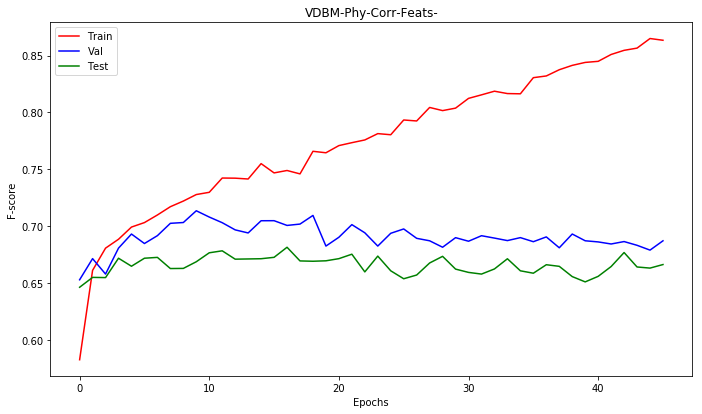

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=46=#==#==#==#==#=


 94%|█████████▍| 2360/2517 [15:32<01:02,  2.53it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [16:33<00:00,  2.53it/s]


==========Epoch No:47==========
Training Loss: 900.886006922
Train: (0.877806031444073, 0.8768375049662296, 0.8744448730237774, None)
                    0            1
Precision    0.889172     0.871247
Recall       0.757872     0.945489
F-score      0.818288     0.906851
Count      921.000000  1596.000000
--------
Val: (0.6868319995004631, 0.6825396825396826, 0.6842483064350212, None)
                    0           1
Precision    0.583012    0.752022
Recall       0.621399    0.720930
F-score      0.601594    0.736148
Count      243.000000  387.000000
--------
Test: (0.6643309368994257, 0.662007623888183, 0.6630633452787146, None)
                    0           1
Precision    0.550489    0.733333
Recall       0.569024    0.718367
F-score      0.559603    0.725773
Count      297.000000  490.000000




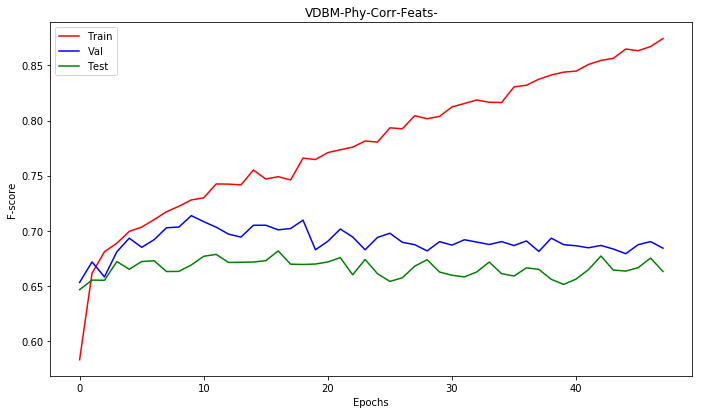

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=48=#==#==#==#==#=


100%|██████████| 2517/2517 [16:13<00:00,  2.59it/s]


==========Epoch No:48==========
Training Loss: 881.347216338
Train: (0.8779174812853623, 0.8772348033373063, 0.8749966245034551, None)
                    0            1
Precision    0.886364     0.873043
Recall       0.762215     0.943609
F-score      0.819615     0.906956
Count      921.000000  1596.000000
--------
Val: (0.6858977443609021, 0.6841269841269841, 0.6849280880360057, None)
                    0           1
Precision    0.588000    0.747368
Recall       0.604938    0.733850
F-score      0.596349    0.740548
Count      243.000000  387.000000
--------
Test: (0.6638530670708723, 0.662007623888183, 0.6628625052791661, None)
                    0           1
Precision    0.550820    0.732365
Recall       0.565657    0.720408
F-score      0.558140    0.726337
Count      297.000000  490.000000




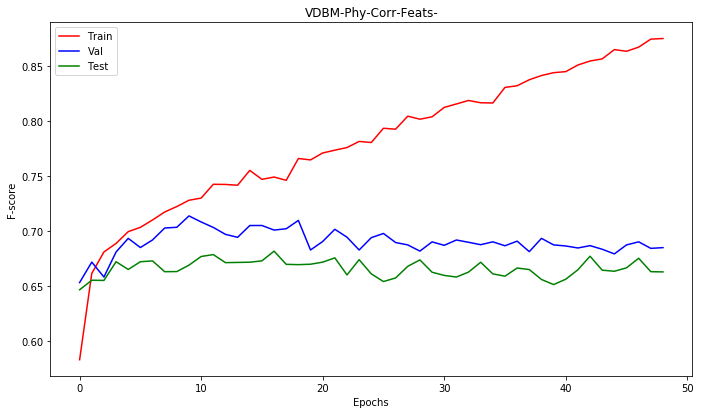

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=49=#==#==#==#==#=


 16%|█▋        | 414/2517 [02:34<13:02,  2.69it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [12:55<00:00,  3.25it/s]


==========Epoch No:50==========
Training Loss: 859.683593839
Train: (0.8840956168241428, 0.8831942789034565, 0.8810844816214719, None)
                    0            1
Precision    0.895334     0.877610
Recall       0.770901     0.947995
F-score      0.828471     0.911446
Count      921.000000  1596.000000
--------
Val: (0.695624325149054, 0.6873015873015873, 0.6900196408790922, None)
                    0           1
Precision    0.584559    0.765363
Recall       0.654321    0.708010
F-score      0.617476    0.735570
Count      243.000000  387.000000
--------
Test: (0.6609831516757004, 0.6531130876747141, 0.6560501853753633, None)
                    0           1
Precision    0.536585    0.736383
Recall       0.592593    0.689796
F-score      0.563200    0.712329
Count      297.000000  490.000000




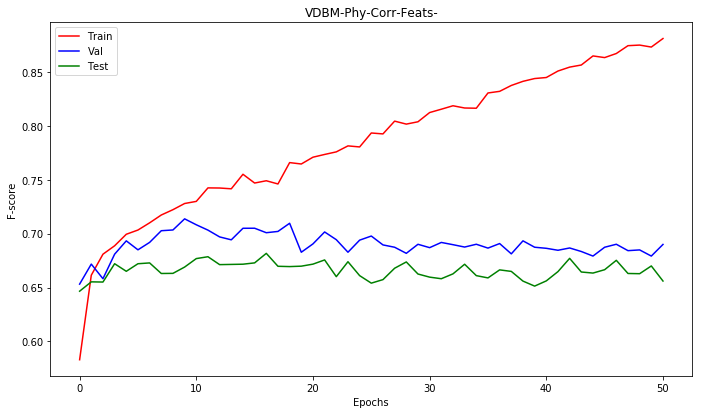

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=51=#==#==#==#==#=


 41%|████      | 1036/2517 [05:26<07:47,  3.17it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [12:59<00:00,  3.23it/s]


==========Epoch No:52==========
Training Loss: 834.51440993
Train: (0.8925366556233194, 0.8919348430671434, 0.8902683930131382, None)
                    0            1
Precision    0.901112     0.887588
Recall       0.791531     0.949875
F-score      0.842775     0.917676
Count      921.000000  1596.000000
--------
Val: (0.6994120034551302, 0.6952380952380952, 0.6968783741776204, None)
                    0           1
Precision    0.598456    0.762803
Recall       0.637860    0.731266
F-score      0.617530    0.746702
Count      243.000000  387.000000
--------
Test: (0.6698334167958415, 0.6658195679796697, 0.6675188877414698, None)
                    0           1
Precision    0.554140    0.739958
Recall       0.585859    0.714286
F-score      0.569558    0.726895
Count      297.000000  490.000000




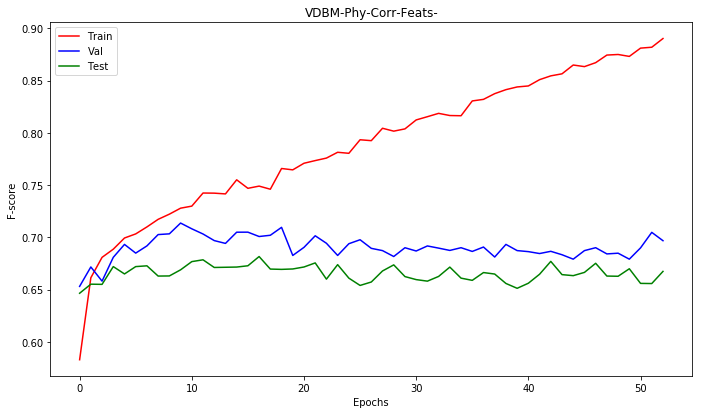

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=53=#==#==#==#==#=


 52%|█████▏    | 1319/2517 [06:44<06:07,  3.26it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [12:44<00:00,  3.29it/s]


==========Epoch No:54==========
Training Loss: 804.376206785
Train: (0.8958308451364537, 0.8951132300357568, 0.8934957932186341, None)
                    0            1
Precision    0.906057     0.889930
Recall       0.795874     0.952381
F-score      0.847399     0.920097
Count      921.000000  1596.000000
--------
Val: (0.6976989512286275, 0.6873015873015873, 0.6903999913918906, None)
                    0           1
Precision    0.582734    0.769886
Recall       0.666667    0.700258
F-score      0.621881    0.733424
Count      243.000000  387.000000
--------
Test: (0.6636490730048489, 0.6543837357052097, 0.6576683454808927, None)
                    0           1
Precision    0.537538    0.740088
Recall       0.602694    0.685714
F-score      0.568254    0.711864
Count      297.000000  490.000000




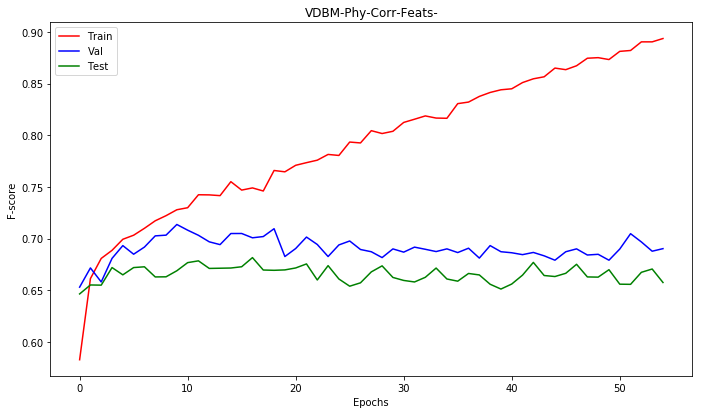

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=55=#==#==#==#==#=


 55%|█████▌    | 1388/2517 [07:11<05:51,  3.22it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [12:58<00:00,  3.23it/s]


==========Epoch No:56==========
Training Loss: 794.374278128
Train: (0.8992068309719434, 0.8982916170043703, 0.8966902457922146, None)
                    0            1
Precision    0.912020     0.891813
Recall       0.799131     0.955514
F-score      0.851852     0.922565
Count      921.000000  1596.000000
--------
Val: (0.6836869985117963, 0.6793650793650794, 0.6810907894993716, None)
                    0           1
Precision    0.579151    0.749326
Recall       0.617284    0.718346
F-score      0.597610    0.733509
Count      243.000000  387.000000
--------
Test: (0.6600092890660096, 0.6518424396442185, 0.6548649584680295, None)
                    0           1
Precision    0.534954    0.735808
Recall       0.592593    0.687755
F-score      0.562300    0.710970
Count      297.000000  490.000000




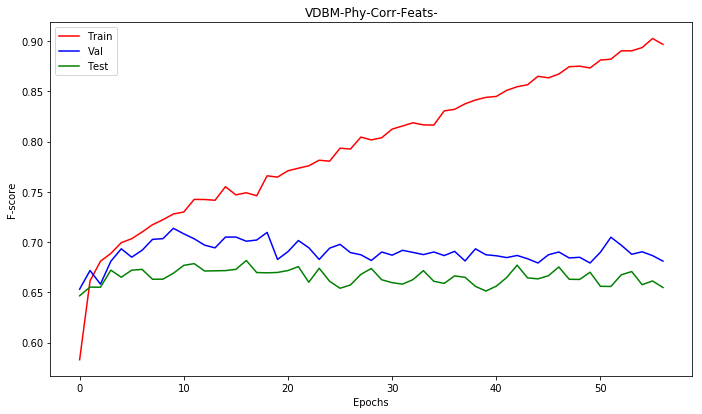

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=57=#==#==#==#==#=


 67%|██████▋   | 1676/2517 [08:47<04:24,  3.18it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 2517/2517 [13:08<00:00,  3.19it/s]


==========Epoch No:58==========
Training Loss: 773.284437895
Train: (0.9098652379689378, 0.9090186730234406, 0.9077463010698489, None)
                    0            1
Precision    0.922983     0.902295
Recall       0.819761     0.960526
F-score      0.868315     0.930501
Count      921.000000  1596.000000
--------
Val: (0.6842831778071475, 0.6793650793650794, 0.6812736205593348, None)
                    0           1
Precision    0.578544    0.750678
Recall       0.621399    0.715762
F-score      0.599206    0.732804
Count      243.000000  387.000000
--------
Test: (0.665768779288397, 0.6556543837357052, 0.6591264383904848, None)
                    0           1
Precision    0.538690    0.742794
Recall       0.609428    0.683673
F-score      0.571880    0.712009
Count      297.000000  490.000000




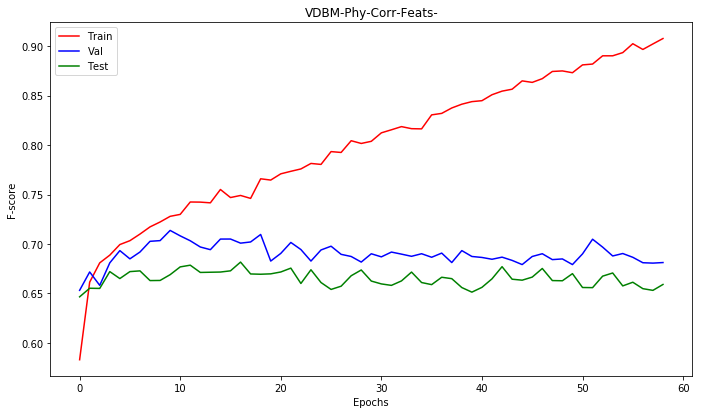

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  
=#==#==#==#==#=59=#==#==#==#==#=


 81%|████████  | 2037/2517 [10:39<02:30,  3.19it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
start_epoch = 0
end_epoch = 60
model_name = params['model_name']
for iter_ in range(start_epoch, end_epoch):
    print "=#="*5+str(iter_)+"=#="*5
    total_loss = 0
    preds_train = []
    actual_train = []
    for each_ID in tqdm(data['train_ids']):
        model_RNN.zero_grad()
        tag_scores = model_RNN(data['data'], each_ID)
        
        _, ind_ = torch.max(tag_scores, dim=1)
        preds_train+=ind_.tolist()
        # For this dataset the label is in -2
        curr_labels = [data['data'][each_ID][label_ind]]
        curr_labels = [batchify.label_mapping[x] for x in curr_labels]
        actual_train+=curr_labels
        curr_labels = torch.cuda.LongTensor(curr_labels)
        curr_labels = autograd.Variable(curr_labels)
        
        loss = loss_function(tag_scores, curr_labels.reshape(tag_scores.shape[0]))
        total_loss+=loss.item()

        loss.backward()
        optimizer.step()
    
    df_tr = pd.DataFrame(list(precision_recall_fscore_support(actual_train, preds_train, 
                                                              labels = [0,1])),
                                                             columns = [0,1])
    df_tr.index = ['Precision','Recall','F-score','Count']
    prf_tr = precision_recall_fscore_support(actual_train, preds_train, average='weighted')
#     prf_tr, df_tr = evaluate_(model_RNN, data, 'train_ids')
    prf_test, df_test = eval_plot.evaluate_dbm(model_RNN, data, 'test_ids')
    prf_val, df_val = eval_plot.evaluate_dbm(model_RNN, data, 'val_ids')
    
    df_all = pd.concat([df_tr, df_val, df_test],axis=1)
    dict_df_prf_mod['Epoch'+str(iter_)] = df_all
    
    print '=='*5 + "Epoch No:"+str(iter_) +"=="*5
    print "Training Loss: "+str(total_loss)
    print "=="*4
    print "Train: " + str(prf_tr)
    print df_tr
    print "--"*4
    print "Val: " + str(prf_val)
    print df_val
    print "--"*4
    print "Test: " + str(prf_test)
    print df_test
    print '=='*40
    print '\n'
    if(save_flag):
        torch.save(model_RNN, '../../Models/'+model_name+str(iter_)+'.pt')
        pickle.dump(dict_df_prf_mod, open('../../Results/dict_prf_'+model_name+str(iter_)+'.pkl','wb'))
        eval_plot.plot_graphs(dict_df_prf_mod, 'F-score', 
                              '../../Plots/'+model_name+str(iter_)+'.png',
                              0, iter_+1, 
                              model_name)

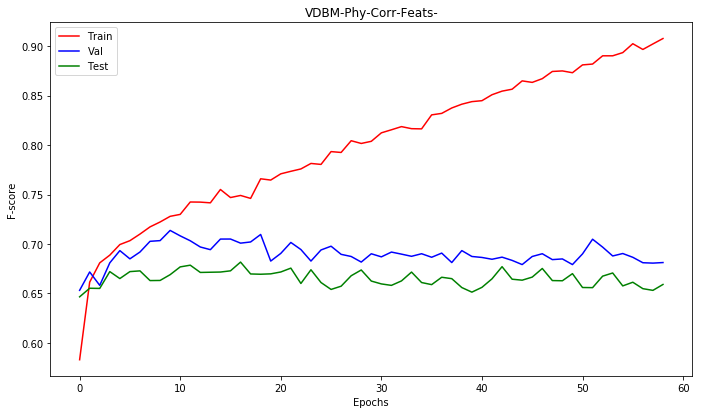

==========Epoch9========
TRAIN: (0.7378517282479141, 0.7417560588001589, 0.7279917275346754)
VAL: (0.7129872313172958, 0.7174603174603175, 0.7137558474369285)
TEST: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.716800     0.750000    0.651163    0.751807    0.580392   
Recall       0.486428     0.889098    0.576132    0.806202    0.498316   
F-score      0.579560     0.813647    0.611354    0.778055    0.536232   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.719925  
Recall       0.781633  
F-score      0.749511  
Count      490.000000  


In [9]:
        eval_plot.plot_graphs(dict_df_prf_mod, 'F-score', 
                              '../../Plots/'+model_name+str(iter_)+'.png',
                              0, iter_, 
                              model_name)